In [147]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [148]:
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [149]:
print(cancer.target_names)
cancer.target_names[0], cancer.target_names[1] = cancer.target_names[1], cancer.target_names[0]
print(cancer.target_names)

['malignant' 'benign']
['benign' 'malignant']


In [150]:
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data = data.assign(target=pd.Series(cancer.target))
data.target = 1 - data.target

In [151]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


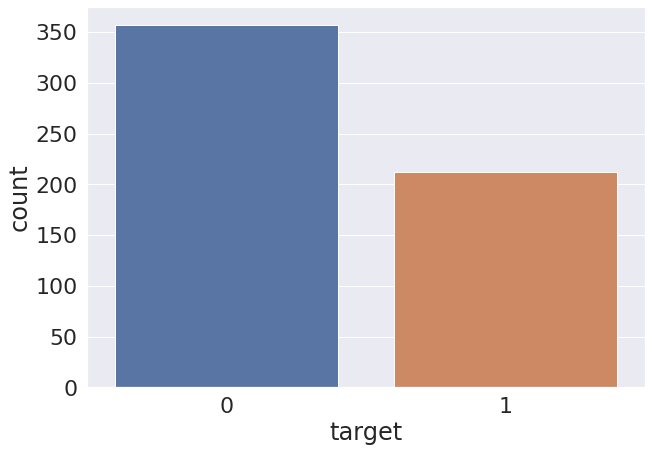

In [152]:
plt.figure(figsize=(10,7))
sns.countplot(x="target", data=data);

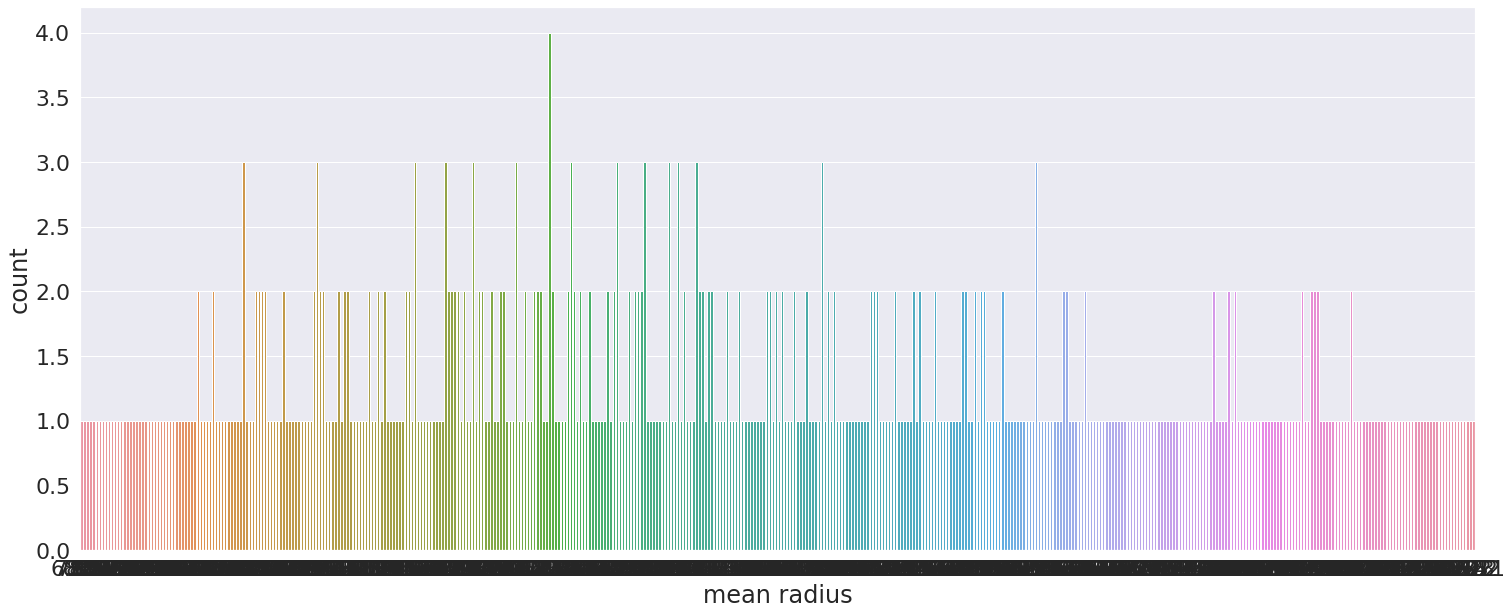

In [153]:
plt.figure(figsize=(25,10))
sns.countplot(x="mean radius", data=data);

In [154]:
lista = cancer.feature_names[:10]
lista = np.hstack([["target"],lista]) 

In [155]:
corMatrica = data[lista].corr()
corMatrica

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
mean radius,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
mean texture,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
mean perimeter,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
mean area,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
mean smoothness,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
mean compactness,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
mean concavity,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
mean concave points,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
mean symmetry,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


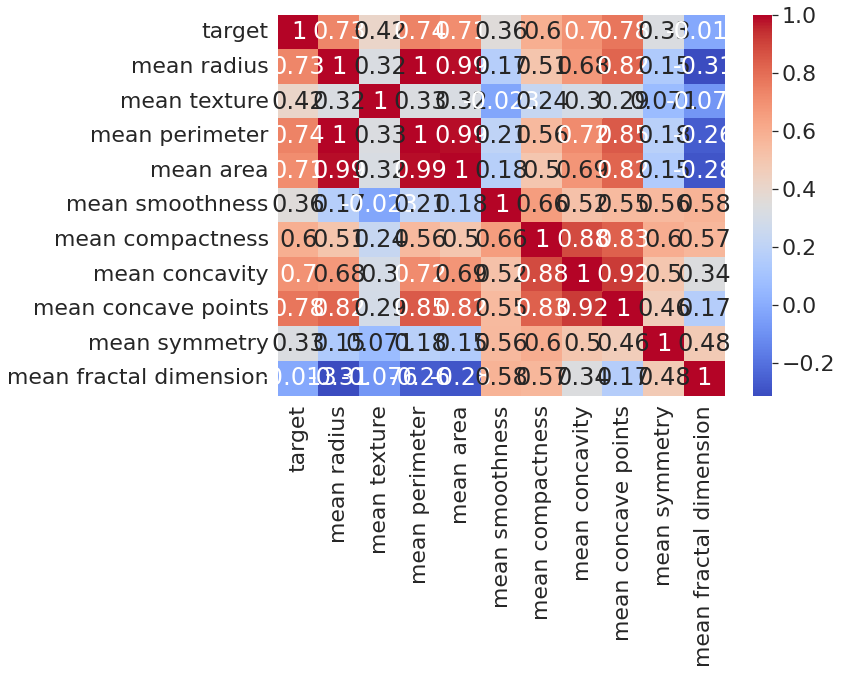

In [156]:
plt.figure(figsize=(10,7))
sns.heatmap(corMatrica, annot=True, cmap="coolwarm");

In [157]:
cora = data.corr().target
cora.drop(cora.tail(1).index,inplace=True)

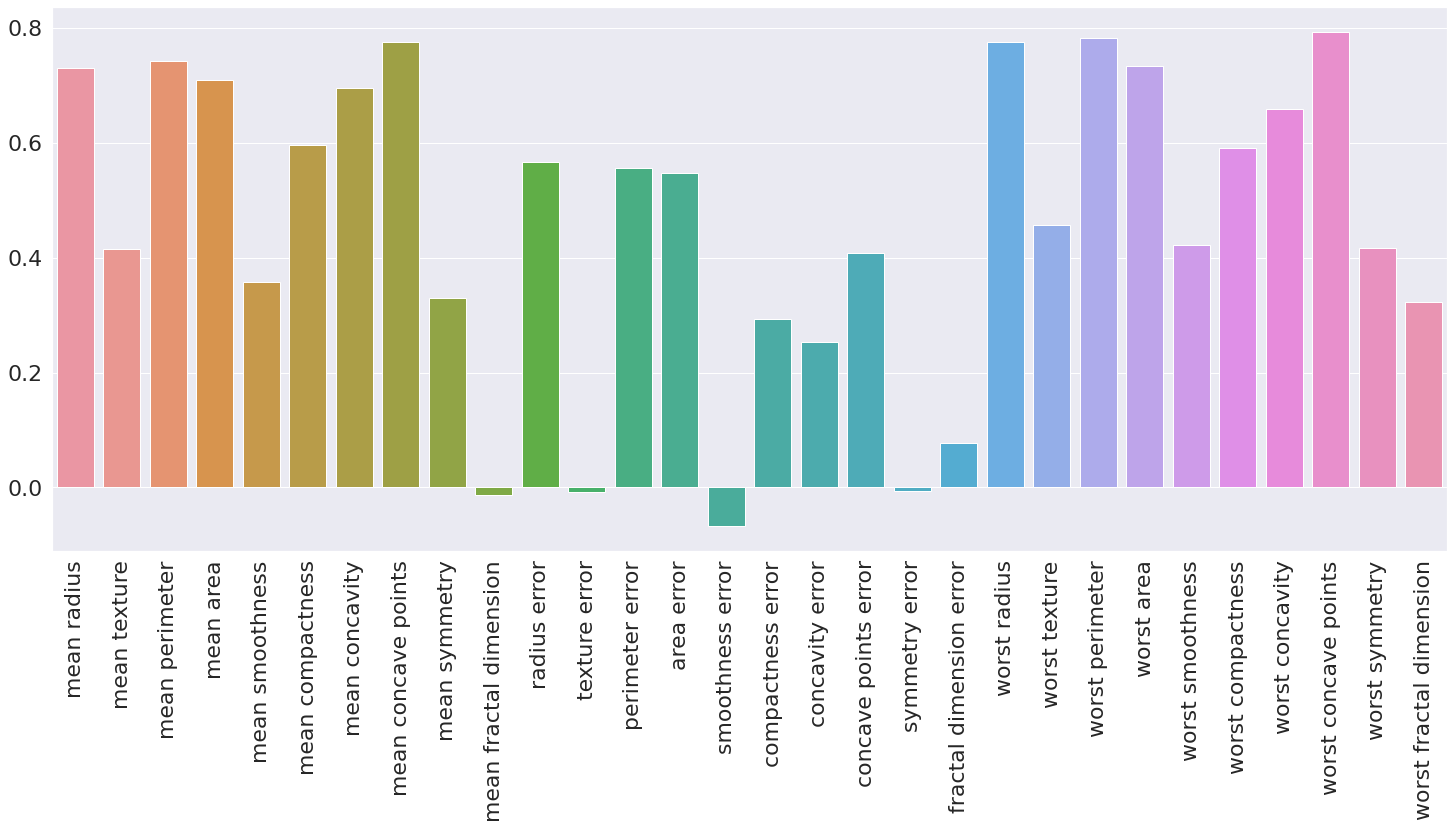

In [158]:
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
sns.barplot(x=cora.index, y=cora.values)
plt.xticks(rotation=90);

Uklanjanje značajki koje imaju manju korelaciju

In [159]:
rm = []
for i in range(len(cora.values)):
    if abs(cora.values[i]) < 0.3:
        rm.append(cora.index[i])
print(rm)

['mean fractal dimension', 'texture error', 'smoothness error', 'compactness error', 'concavity error', 'symmetry error', 'fractal dimension error']


In [160]:
fullData = data
data = data.drop(columns=rm, inplace=False)

**ML**

In [161]:
train=data.sample(frac=0.75,random_state=101)
test=data.drop(train.index)

In [162]:
x_train = train.drop(columns=["target"])
y_train = train.drop(columns=train.columns[:len(train.columns)-1])

In [163]:
x_test = test.drop(columns=["target"])
y_test = test.drop(columns=test.columns[:len(test.columns)-1])

In [164]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [165]:
accu = {}

Logistic Regression

In [166]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 1000).fit(x_train, np.ravel(y_train.values))
prediction = clf.predict(x_test)

In [167]:
from sklearn.metrics import classification_report
print(classification_report(y_train,clf.predict(x_train)))
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       269
           1       0.99      0.97      0.98       158

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        88
           1       0.98      0.96      0.97        54

    accuracy                           0.98       142
   macro avg       0.98      0.98      0.98       142
weighted avg       0.98      0.98      0.98       142



Trening set ima accuracy 98.82903981264637%, a test set ima accuracy 97.88732394366197%


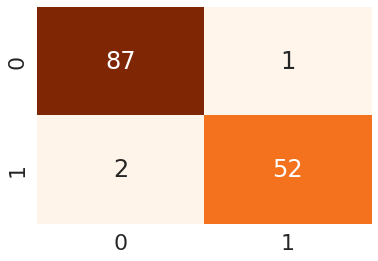

In [168]:
from sklearn.metrics import confusion_matrix, accuracy_score
matricaKonfuzije = confusion_matrix(y_test, prediction)
sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True);
sns.heatmap(matricaKonfuzije, annot=True, cbar=False, cmap="Oranges");
print("Trening set ima accuracy {}%, a test set ima accuracy {}%".format(accuracy_score(y_train,clf.predict(x_train))*100, accuracy_score(y_test, prediction)*100))

In [169]:
accu["Logstic Regression"] = [accuracy_score(y_train,clf.predict(x_train))*100, accuracy_score(y_test, prediction)*100]

Support Vector Machine

In [170]:
from sklearn import svm
clf = svm.SVC(kernel="rbf").fit(x_train, np.ravel(y_train))
prediction = clf.predict(x_test)

In [171]:
print(classification_report(y_train,clf.predict(x_train)))
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       269
           1       0.99      0.96      0.98       158

    accuracy                           0.98       427
   macro avg       0.99      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.98      0.98      0.98        54

    accuracy                           0.99       142
   macro avg       0.99      0.99      0.99       142
weighted avg       0.99      0.99      0.99       142



Trening set ima accuracy 98.36065573770492%, a test set ima accuracy 98.59154929577466%


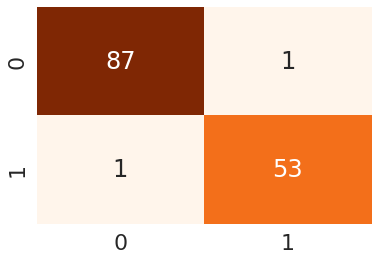

In [172]:
matricaKonfuzije = confusion_matrix(y_test, prediction)
sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True);
sns.heatmap(matricaKonfuzije, annot=True, cbar=False, cmap="Oranges");
print("Trening set ima accuracy {}%, a test set ima accuracy {}%".format(accuracy_score(y_train,clf.predict(x_train))*100, accuracy_score(y_test, prediction)*100))

In [173]:
accu["SVM"] = [accuracy_score(y_train,clf.predict(x_train))*100, accuracy_score(y_test, prediction)*100]

Random forest

In [174]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=40).fit(x_train, np.ravel(y_train))
prediction = clf.predict(x_test)

In [175]:
print(classification_report(y_train,clf.predict(x_train)))
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       1.00      0.99      1.00       158

    accuracy                           1.00       427
   macro avg       1.00      1.00      1.00       427
weighted avg       1.00      1.00      1.00       427

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        88
           1       0.96      0.96      0.96        54

    accuracy                           0.97       142
   macro avg       0.97      0.97      0.97       142
weighted avg       0.97      0.97      0.97       142



Trening set ima accuracy 99.76580796252928%, a test set ima accuracy 97.1830985915493%


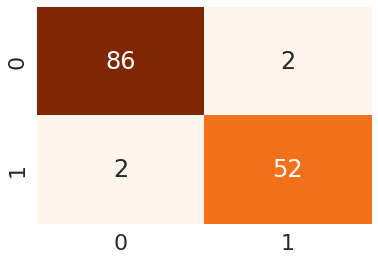

In [176]:
matricaKonfuzije = confusion_matrix(y_test, prediction)
sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True);
sns.heatmap(matricaKonfuzije, annot=True, cbar=False, cmap="Oranges");
print("Trening set ima accuracy {}%, a test set ima accuracy {}%".format(accuracy_score(y_train,clf.predict(x_train))*100, accuracy_score(y_test, prediction)*100))

In [177]:
accu["Random Forest"] = [accuracy_score(y_train,clf.predict(x_train))*100, accuracy_score(y_test, prediction)*100]

Naive Bayes

In [178]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(x_train, np.ravel(y_train))
prediction = clf.predict(x_test)

In [179]:
print(classification_report(y_train,clf.predict(x_train)))
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       269
           1       0.93      0.88      0.90       158

    accuracy                           0.93       427
   macro avg       0.93      0.92      0.92       427
weighted avg       0.93      0.93      0.93       427

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        88
           1       0.96      0.93      0.94        54

    accuracy                           0.96       142
   macro avg       0.96      0.95      0.95       142
weighted avg       0.96      0.96      0.96       142



Trening set ima accuracy 92.97423887587823%, a test set ima accuracy 95.77464788732394%


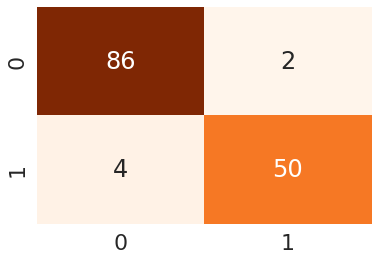

In [180]:
matricaKonfuzije = confusion_matrix(y_test, prediction)
sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True);
sns.heatmap(matricaKonfuzije, annot=True, cbar=False, cmap="Oranges");
print("Trening set ima accuracy {}%, a test set ima accuracy {}%".format(accuracy_score(y_train,clf.predict(x_train))*100, accuracy_score(y_test, prediction)*100))

In [181]:
accu["Naive Bayes"] = [accuracy_score(y_train,clf.predict(x_train))*100, accuracy_score(y_test, prediction)*100]

Decision Tree

In [182]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, np.ravel(y_train))
prediction = clf.predict(x_test)

In [183]:
print(classification_report(y_train,clf.predict(x_train)))
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       1.00      1.00      1.00       158

    accuracy                           1.00       427
   macro avg       1.00      1.00      1.00       427
weighted avg       1.00      1.00      1.00       427

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        88
           1       0.94      0.93      0.93        54

    accuracy                           0.95       142
   macro avg       0.95      0.95      0.95       142
weighted avg       0.95      0.95      0.95       142



Trening set ima accuracy 100.0%, a test set ima accuracy 95.07042253521126%


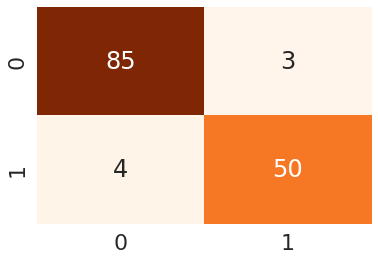

In [184]:
matricaKonfuzije = confusion_matrix(y_test, prediction)
sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True);
sns.heatmap(matricaKonfuzije, annot=True, cbar=False, cmap="Oranges");
print("Trening set ima accuracy {}%, a test set ima accuracy {}%".format(accuracy_score(y_train,clf.predict(x_train))*100, accuracy_score(y_test, prediction)*100))

In [185]:
accu["Decision Tree"] = [accuracy_score(y_train,clf.predict(x_train))*100, accuracy_score(y_test, prediction)*100]

K-Nearest Neighbors (KNN)

In [186]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=9).fit(x_train, np.ravel(y_train))
prediction = clf.predict(x_test)

In [187]:
print(classification_report(y_train,clf.predict(x_train)))
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       269
           1       0.98      0.94      0.96       158

    accuracy                           0.97       427
   macro avg       0.97      0.96      0.97       427
weighted avg       0.97      0.97      0.97       427

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.98      0.94      0.96        54

    accuracy                           0.97       142
   macro avg       0.97      0.97      0.97       142
weighted avg       0.97      0.97      0.97       142



Trening set ima accuracy 96.95550351288055%, a test set ima accuracy 97.1830985915493%


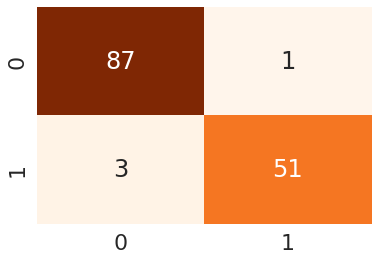

In [188]:
matricaKonfuzije = confusion_matrix(y_test, prediction)
sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True);
sns.heatmap(matricaKonfuzije, annot=True, cbar=False, cmap="Oranges");
print("Trening set ima accuracy {}%, a test set ima accuracy {}%".format(accuracy_score(y_train,clf.predict(x_train))*100, accuracy_score(y_test, prediction)*100))

In [189]:
accu["KNN"] = [accuracy_score(y_train,clf.predict(x_train))*100, accuracy_score(y_test, prediction)*100]

**Zaključak**

In [190]:
for i in accu:
    print("Za {:^20} accuraccy na trening setu je {:.2f}%, a na test setu {:.2f}%".format(i, accu[i][0], accu[i][1]))

Za  Logstic Regression  accuraccy na trening setu je 98.83%, a na test setu 97.89%
Za         SVM          accuraccy na trening setu je 98.36%, a na test setu 98.59%
Za    Random Forest     accuraccy na trening setu je 99.77%, a na test setu 97.18%
Za     Naive Bayes      accuraccy na trening setu je 92.97%, a na test setu 95.77%
Za    Decision Tree     accuraccy na trening setu je 100.00%, a na test setu 95.07%
Za         KNN          accuraccy na trening setu je 96.96%, a na test setu 97.18%


**Odgovori na pitanja:**

Vrsta istraživanja prema:
- svrsi - primjenjeno istraživanje ... stvaranje praktičnog znanstvenog znanja
- izvoru informacija - primarno istraživanje ... koriste se podaci koji su došli izravno iz izvora, u našem slučaju podaci o tumoru koji se nalaze u WBCD-u.
- vremenu provedbe - studija presjeka (sinkrono istraživanje) ... promatra se mnogo različitih uzoraka, svaki se gleda u samo jednoj točki u vremenu
- načinu prikupljanja podataka - laboratorijsko istraživanje ... izolirana je zavisna varijabla (maligno/benigno) i uspostavlja se odnos s drugim varijablama
- vrsti korištenih podataka - kvantitativno ... koriste se mjerljive varijable, korištenje statistike, može se ponoviti istraživanje u svrhu potvrde rezultata
- stupnju manipulacije varijablama - promatračko istraživanje ... nema interakscije s varijablama, samo mjerenje za potrebe istraživanja
- dubini - korelacijsko istraživanje ... ovisnost zavisne varijable o ostalim varijablama
- vrsti zaključka - induktivno istraživanje ... analiza promatranog, znanje se generira promatranjem kako bi se postigla generalizacija
***

Metode kako su podaci prikupljeni:

Metoda koja najviše odgovara prikupljanju podatak za zadani rad je dokumentarno istraživanje.
***

Jesu li podaci prikupljeni i objavljeni prema pravilima istraživačke etike?

Prikupljanje i objavljivanje podataka u potpunosti je u skladu s pravilima istraživačke etike.

Drugi, timski dio projekta:

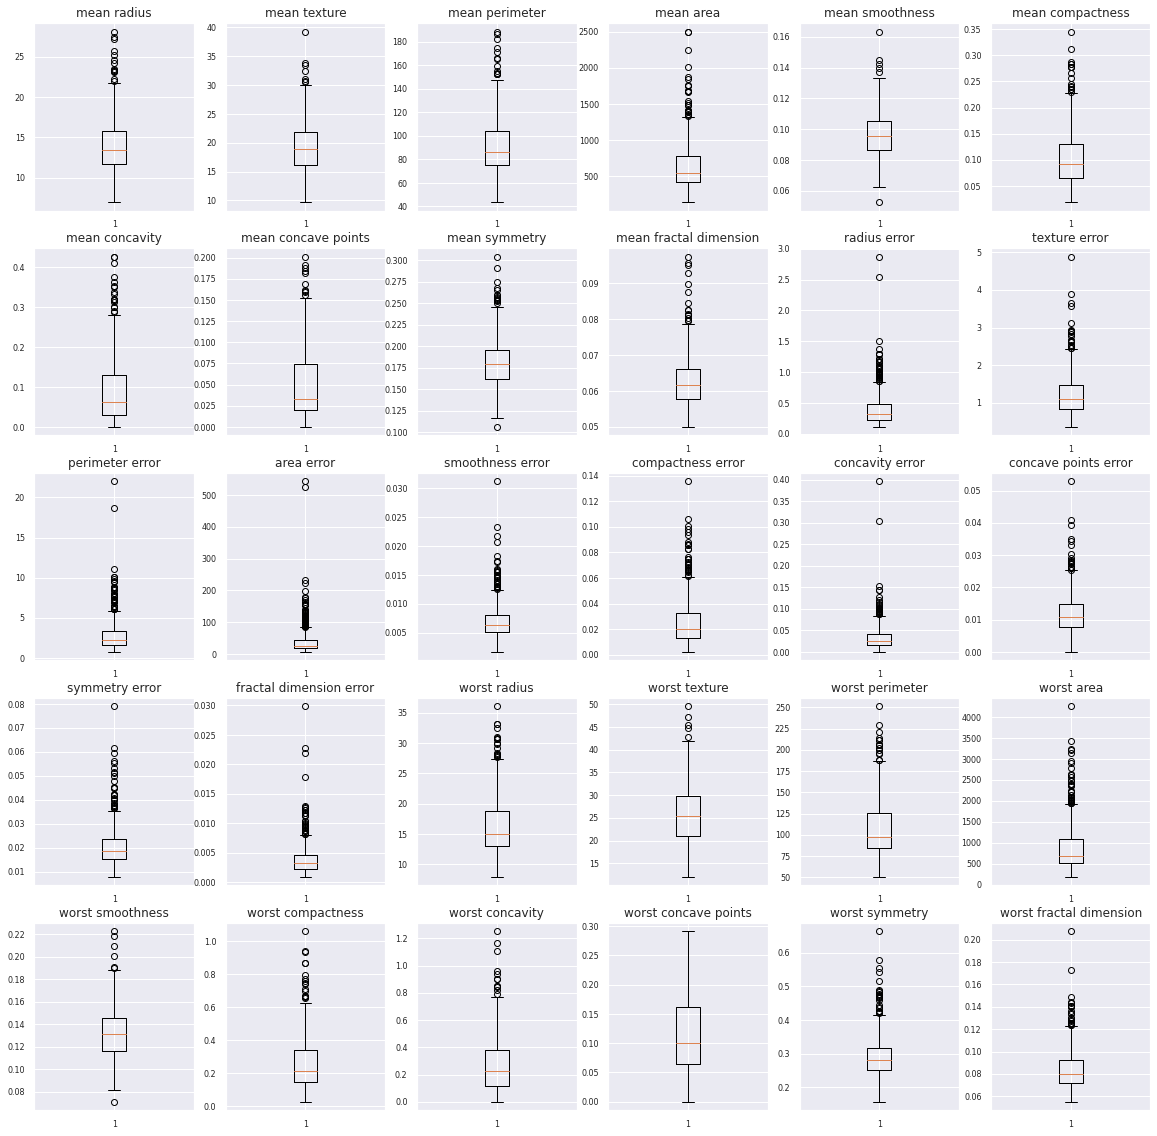

In [191]:
znacajke = fullData.columns.drop("target")

fig, axis = plt.subplots(5,6, figsize=(20,20))
counter, k = 0,0
for i,elem in enumerate(znacajke):
  axis[k,i%6].boxplot(fullData[elem])
  axis[k,i%6].set_title(elem, fontsize=12)
  axis[k,i%6].tick_params(labelsize=8)
  counter+=1
  if counter == 6:
    counter = 0
    k+=1

Gledajući dobivene grafove, odlučujemo se za izbacivanje uzoraka s velikim stršećim vrijednostima za neku od sljedećih značajki: radius error, perimeter error, area error, compactness error, concavity error, worst area, worst symmetry, worst fractal dimension.

In [192]:
ind = list(fullData.index[fullData['radius error'] > 1.5])
fullData = fullData.drop(index=ind)

ind = list(fullData.index[fullData['perimeter error'] > 10])
fullData = fullData.drop(index=ind)

ind = list(fullData.index[fullData['area error'] > 220])
fullData = fullData.drop(index=ind)

ind = list(fullData.index[fullData['compactness error'] > 0.12])
fullData = fullData.drop(index=ind)

ind = list(fullData.index[fullData['concavity error'] > 0.2])
fullData = fullData.drop(index=ind)

ind = list(fullData.index[fullData['worst area'] > 4000])
fullData = fullData.drop(index=ind)

ind = list(fullData.index[fullData['worst symmetry'] > 0.6])
fullData = fullData.drop(index=ind)

ind = list(fullData.index[fullData['worst fractal dimension'] > 0.16])
fullData = fullData.drop(index=ind)

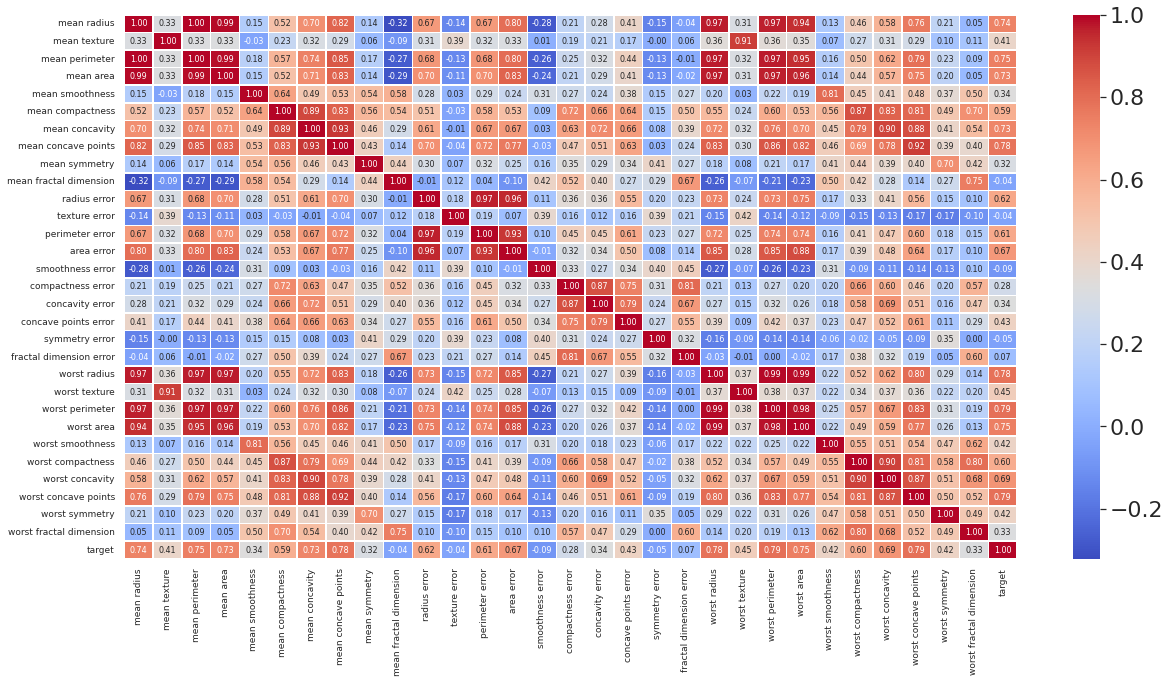

In [193]:
plt.figure(figsize=(20,10))
plt.tick_params(labelsize=9)
sns.heatmap(fullData.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, annot_kws={"size": 8});

In [194]:
testData = fullData.drop(["mean area", "mean radius", "worst area", "worst radius", "mean concave points", "perimeter error", "area error", "worst concavity", "worst perimeter", "mean texture"], axis=1)

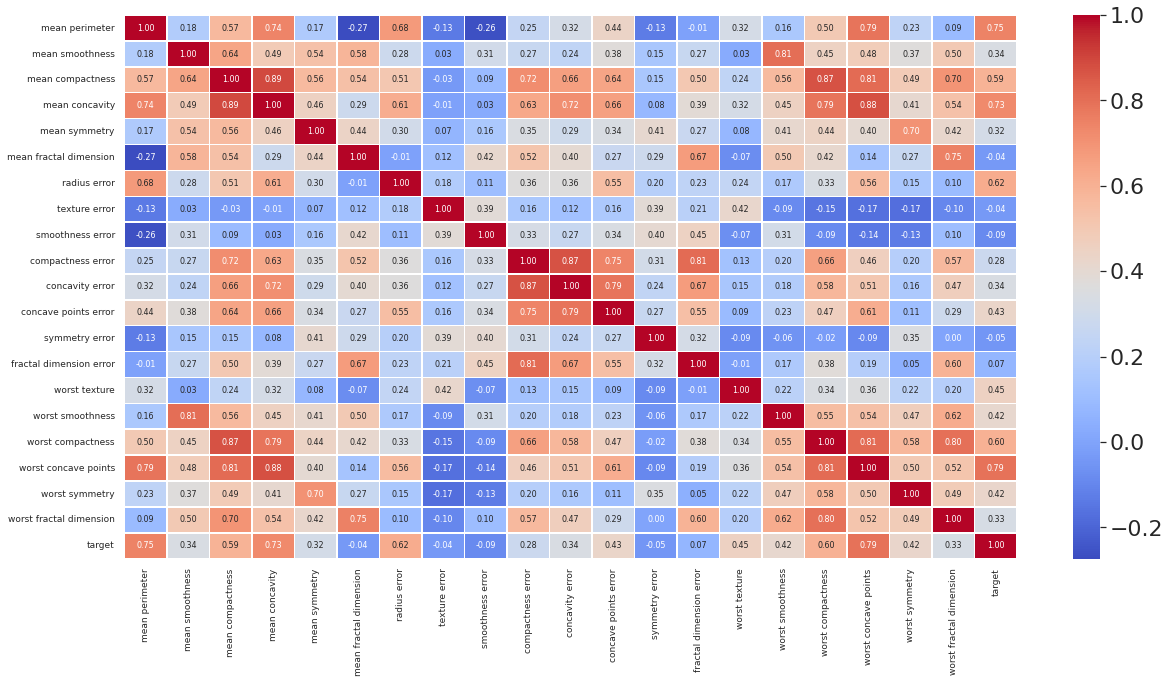

In [195]:
plt.figure(figsize=(20,10))
plt.tick_params(labelsize=9)
sns.heatmap(testData.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, annot_kws={"size": 8});

Pregled ovisnosti preciznosti modela s obzirom na broj značajki modela.

In [196]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from tqdm import tqdm, trange
from sklearn.metrics import roc_curve, auc

oznake = fullData.target.values
X = fullData.drop("target", axis = 1)

brF = np.arange(2,31,1)
trainXS, testXS, trainY, testY = train_test_split(X, oznake, test_size=0.25)

In [197]:
labels = fullData.target.values
X2 = testData.drop("target", axis = 1)

brF2 = np.arange(2,21,1)
trainXS2, testXS2, trainY2, testY2 = train_test_split(X2, labels, test_size=0.25)

In [198]:
accuAll=[]

Logistička regresija

In [199]:
ROClist = []

100%|██████████| 19/19 [00:00<00:00, 29.87it/s]


Najbolja točnost na test setu je 96.43% za k=3 najboljih (kBest) značajki
Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je 96.43% za k=6 najboljih (kBest) značajki


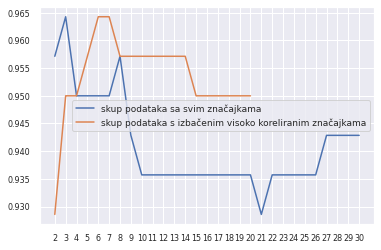

In [200]:
listaAccu = []
listaAccu2 = []

for i in tqdm(brF):
  select = SelectKBest(chi2, k=i)
  trainX = select.fit_transform(trainXS, trainY)
  testX = select.transform(testXS)
  clf = LogisticRegression(max_iter = 2000).fit(trainX, np.ravel(trainY))
  prediction = clf.predict(testX)
  listaAccu.append(accuracy_score(testY, prediction))

for i in tqdm(brF2):
  select = SelectKBest(chi2, k=i)
  trainX2 = select.fit_transform(trainXS2, trainY2)
  testX2 = select.transform(testXS2)
  clf = LogisticRegression(max_iter = 2000).fit(trainX2, np.ravel(trainY2))
  prediction = clf.predict(testX2)
  listaAccu2.append(accuracy_score(testY2, prediction))

fpr, tpr, _ = roc_curve(testY2, prediction)
ROClist.append([fpr, tpr])
plt.plot(brF,listaAccu)
plt.plot(brF2,listaAccu2)
plt.xticks(brF)
plt.tick_params(labelsize=8);
plt.legend(["skup podataka sa svim značajkama", "skup podataka s izbačenim visoko koreliranim značajkama"], fontsize=9)

print("Najbolja točnost na test setu je {:.2f}% za k={:d} najboljih (kBest) značajki".format(max(listaAccu)*100, listaAccu.index(max(listaAccu))+2))
print("Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je {:.2f}% za k={:d} najboljih (kBest) značajki".format(max(listaAccu2)*100, listaAccu2.index(max(listaAccu2))+2))
accuAll.append(["Logistic regression", max(listaAccu)*100, max(listaAccu2)*100])

SVM

100%|██████████| 19/19 [00:00<00:00, 51.28it/s]


Najbolja točnost na test setu je 95.71% za k=2 najboljih (kBest) značajki
Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je 97.14% za k=5 najboljih (kBest) značajki


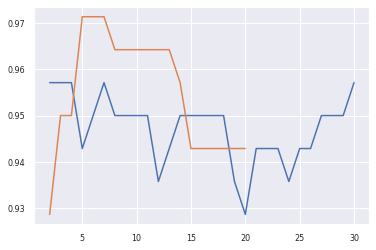

In [201]:
listaAccu = []
listaAccu2 = []

for i in tqdm(brF):
  select = SelectKBest(chi2, k=i)
  trainX = select.fit_transform(trainXS, trainY)
  testX = select.transform(testXS)
  clf = svm.SVC(kernel="linear").fit(trainX, np.ravel(trainY))
  prediction = clf.predict(testX)
  listaAccu.append(accuracy_score(testY, prediction))
  
for i in tqdm(brF2):
  select = SelectKBest(chi2, k=i)
  trainX2 = select.fit_transform(trainXS2, trainY2)
  testX2 = select.transform(testXS2)
  clf = svm.SVC(kernel="linear").fit(trainX2, np.ravel(trainY2))
  prediction = clf.predict(testX2)
  listaAccu2.append(accuracy_score(testY2, prediction))

fpr, tpr, _ = roc_curve(testY2, prediction)
ROClist.append([fpr, tpr])
plt.plot(brF,listaAccu)
plt.plot(brF2,listaAccu2)
plt.tick_params(labelsize=8);
accuAll.append(["SVM", max(listaAccu)*100, max(listaAccu2)*100])

print("Najbolja točnost na test setu je {:.2f}% za k={:d} najboljih (kBest) značajki".format(max(listaAccu)*100, listaAccu.index(max(listaAccu))+2))
print("Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je {:.2f}% za k={:d} najboljih (kBest) značajki".format(max(listaAccu2)*100, listaAccu2.index(max(listaAccu2))+2))

Random Forest

100%|██████████| 19/19 [00:03<00:00,  5.07it/s]


Najbolja točnost na test setu je 97.14% za k=7 najboljih (kBest) značajki
Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je 97.14% za k=15 najboljih (kBest) značajki


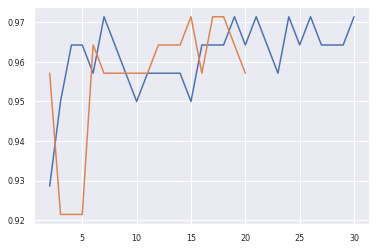

In [202]:
listaAccu = []
listaAccu2 = []

for i in tqdm(brF):
  select = SelectKBest(chi2, k=i)
  trainX = select.fit_transform(trainXS, trainY)
  testX = select.transform(testXS)
  clf = RandomForestClassifier().fit(trainX, np.ravel(trainY))
  prediction = clf.predict(testX)
  listaAccu.append(accuracy_score(testY, prediction))

for i in tqdm(brF2):
  select = SelectKBest(chi2, k=i)
  trainX2 = select.fit_transform(trainXS2, trainY2)
  testX2 = select.transform(testXS2)
  clf = RandomForestClassifier().fit(trainX2, np.ravel(trainY2))
  prediction = clf.predict(testX2)
  listaAccu2.append(accuracy_score(testY2, prediction))

fpr, tpr, _ = roc_curve(testY2, prediction)
ROClist.append([fpr, tpr])
plt.plot(brF,listaAccu)
plt.plot(brF2,listaAccu2)
plt.tick_params(labelsize=8);
accuAll.append(["Random forest", max(listaAccu)*100, max(listaAccu2)*100])

print("Najbolja točnost na test setu je {:.2f}% za k={:d} najboljih (kBest) značajki".format(max(listaAccu)*100, listaAccu.index(max(listaAccu))+2))
print("Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je {:.2f}% za k={:d} najboljih (kBest) značajki".format(max(listaAccu2)*100, listaAccu2.index(max(listaAccu2))+2))

Naive Bayes

100%|██████████| 19/19 [00:00<00:00, 137.30it/s]


Najbolja točnost na test setu je 96.43% za k=19 najboljih (kBest) značajki
Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je 95.71% za k=4 najboljih (kBest) značajki


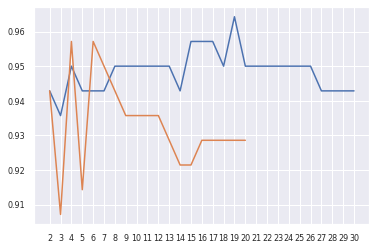

In [203]:
listaAccu = []
listaAccu2 = []

for i in tqdm(brF):
  select = SelectKBest(chi2, k=i)
  trainX = select.fit_transform(trainXS, trainY)
  testX = select.transform(testXS)
  clf = GaussianNB().fit(trainX, np.ravel(trainY))
  prediction = clf.predict(testX)
  listaAccu.append(accuracy_score(testY, prediction))

for i in tqdm(brF2):
  select = SelectKBest(chi2, k=i)
  trainX2 = select.fit_transform(trainXS2, trainY2)
  testX2 = select.transform(testXS2)
  clf = GaussianNB().fit(trainX2, np.ravel(trainY2))
  prediction = clf.predict(testX2)
  listaAccu2.append(accuracy_score(testY2, prediction))

fpr, tpr, _ = roc_curve(testY2, prediction)
ROClist.append([fpr, tpr])
plt.plot(brF,listaAccu)
plt.plot(brF2,listaAccu2)
plt.xticks(brF)
plt.tick_params(labelsize=8);
accuAll.append(["Naive Bayes", max(listaAccu)*100, max(listaAccu2)*100])

print("Najbolja točnost na test setu je {:.2f}% za k={:d} najboljih (kBest) značajki".format(max(listaAccu)*100, listaAccu.index(max(listaAccu))+2))
print("Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je {:.2f}% za k={:d} najboljih (kBest) značajki".format(max(listaAccu2)*100, listaAccu2.index(max(listaAccu2))+2))

Decision Tree

100%|██████████| 19/19 [00:00<00:00, 105.88it/s]


Najbolja točnost na test setu je 95.71% za k=13 najboljih (kBest) značajki
Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je 94.29% za k=8 najboljih (kBest) značajki


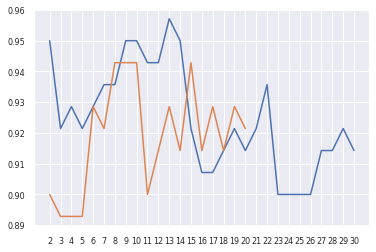

In [204]:
listaAccu = []
listaAccu2 = []

for i in tqdm(brF):
  select = SelectKBest(chi2, k=i)
  trainX = select.fit_transform(trainXS, trainY)
  testX = select.transform(testXS)
  clf = DecisionTreeClassifier().fit(trainX, np.ravel(trainY))
  prediction = clf.predict(testX)
  listaAccu.append(accuracy_score(testY, prediction))

for i in tqdm(brF2):
  select = SelectKBest(chi2, k=i)
  trainX2 = select.fit_transform(trainXS2, trainY2)
  testX2 = select.transform(testXS2)
  clf = DecisionTreeClassifier().fit(trainX2, np.ravel(trainY2))
  prediction = clf.predict(testX2)
  listaAccu2.append(accuracy_score(testY2, prediction))

fpr, tpr, _ = roc_curve(testY2, prediction)
ROClist.append([fpr, tpr])
plt.plot(brF,listaAccu)
plt.plot(brF2,listaAccu2)
plt.xticks(brF)
plt.tick_params(labelsize=8);
accuAll.append(["Descision Tree", max(listaAccu)*100, max(listaAccu2)*100])

print("Najbolja točnost na test setu je {:.2f}% za k={:d} najboljih (kBest) značajki".format(max(listaAccu)*100, listaAccu.index(max(listaAccu))+2))
print("Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je {:.2f}% za k={:d} najboljih (kBest) značajki".format(max(listaAccu2)*100, listaAccu2.index(max(listaAccu2))+2))

kNN

100%|██████████| 19/19 [00:00<00:00, 62.64it/s]


Najbolja točnost na test setu je 95.71% za k=4 najboljih (kBest) značajki
Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je 92.86% za k=2 najboljih (kBest) značajki


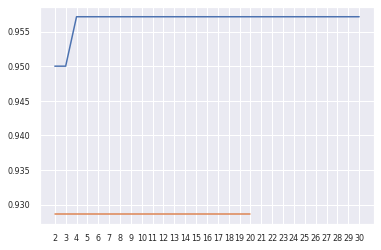

In [205]:
listaAccu = []
listaAccu2 = []

for i in tqdm(brF):
  select = SelectKBest(chi2, k=i)
  trainX = select.fit_transform(trainXS, trainY)
  testX = select.transform(testXS)
  clf = KNeighborsClassifier(n_neighbors=9).fit(trainX, np.ravel(trainY))
  prediction = clf.predict(testX)
  listaAccu.append(accuracy_score(testY, prediction))

for i in tqdm(brF2):
  select = SelectKBest(chi2, k=i)
  trainX2 = select.fit_transform(trainXS2, trainY2)
  testX2 = select.transform(testXS2)
  clf = KNeighborsClassifier(n_neighbors=9).fit(trainX2, np.ravel(trainY2))
  prediction = clf.predict(testX2)
  listaAccu2.append(accuracy_score(testY2, prediction))

fpr, tpr, _ = roc_curve(testY2, prediction)
ROClist.append([fpr, tpr])
plt.plot(brF,listaAccu)
plt.plot(brF2,listaAccu2)
plt.xticks(brF)
plt.tick_params(labelsize=8);
accuAll.append(["kNN", max(listaAccu)*100, max(listaAccu2)*100])

print("Najbolja točnost na test setu je {:.2f}% za k={:d} najboljih (kBest) značajki".format(max(listaAccu)*100, listaAccu.index(max(listaAccu))+2))
print("Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je {:.2f}% za k={:d} najboljih (kBest) značajki".format(max(listaAccu2)*100, listaAccu2.index(max(listaAccu2))+2))

XGBoost

100%|██████████| 19/19 [00:01<00:00, 18.67it/s]


Najbolja točnost na test setu je 97.86% za k=17 najboljih (kBest) značajki
Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je 96.43% za k=11 najboljih (kBest) značajki


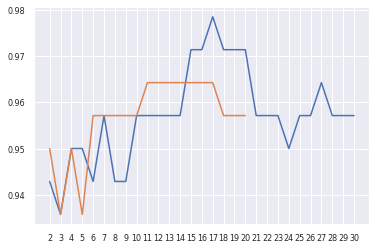

In [206]:
import xgboost as xgb
listaAccu = []
listaAccu2 = []

for i in tqdm(brF):
  select = SelectKBest(chi2, k=i)
  trainX = select.fit_transform(trainXS, trainY)
  testX = select.transform(testXS)
  clf = xgb.XGBClassifier().fit(trainX, np.ravel(trainY))
  prediction = clf.predict(testX)
  listaAccu.append(accuracy_score(testY, prediction))

for i in tqdm(brF2):
  select = SelectKBest(chi2, k=i)
  trainX2 = select.fit_transform(trainXS2, trainY2)
  testX2 = select.transform(testXS2)
  clf = xgb.XGBClassifier().fit(trainX2, np.ravel(trainY2))
  prediction = clf.predict(testX2)
  listaAccu2.append(accuracy_score(testY2, prediction))

fpr, tpr, _ = roc_curve(testY2, prediction)
ROClist.append([fpr, tpr])
plt.plot(brF,listaAccu)
plt.plot(brF2,listaAccu2)
plt.xticks(brF)
plt.tick_params(labelsize=8);
accuAll.append(["XGBoost", max(listaAccu)*100, max(listaAccu2)*100])

print("Najbolja točnost na test setu je {:.2f}% za k={:d} najboljih (kBest) značajki".format(max(listaAccu)*100, listaAccu.index(max(listaAccu))+2))
print("Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je {:.2f}% za k={:d} najboljih (kBest) značajki".format(max(listaAccu2)*100, listaAccu2.index(max(listaAccu2))+2))

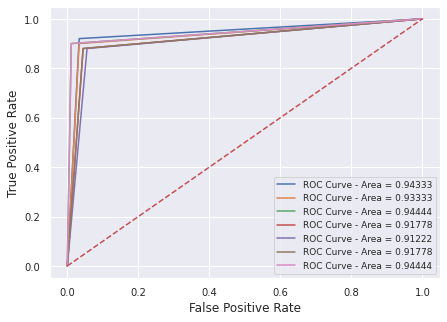

In [207]:
legend=[]
plt.figure(figsize=(7,5))
for i in ROClist:
  plt.plot(i[0], i[1])
  legend.append("ROC Curve - Area = {:.5f}".format(auc(i[0], i[1])))
plt.legend(legend, fontsize=9)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.tick_params(labelsize=10);

In [208]:
for i in accuAll:
      print("Za {:^20} točnost na osnovnom (neuređenom) setu podataka je {:.2f}%, a na setu sa izbačenim visoko koreliranim značajkama je {:.2f}%".format(i[0], i[1], i[2]))

Za Logistic regression  točnost na osnovnom (neuređenom) setu podataka je 96.43%, a na setu sa izbačenim visoko koreliranim značajkama je 96.43%
Za         SVM          točnost na osnovnom (neuređenom) setu podataka je 95.71%, a na setu sa izbačenim visoko koreliranim značajkama je 97.14%
Za    Random forest     točnost na osnovnom (neuređenom) setu podataka je 97.14%, a na setu sa izbačenim visoko koreliranim značajkama je 97.14%
Za     Naive Bayes      točnost na osnovnom (neuređenom) setu podataka je 96.43%, a na setu sa izbačenim visoko koreliranim značajkama je 95.71%
Za    Descision Tree    točnost na osnovnom (neuređenom) setu podataka je 95.71%, a na setu sa izbačenim visoko koreliranim značajkama je 94.29%
Za         kNN          točnost na osnovnom (neuređenom) setu podataka je 95.71%, a na setu sa izbačenim visoko koreliranim značajkama je 92.86%
Za       XGBoost        točnost na osnovnom (neuređenom) setu podataka je 97.86%, a na setu sa izbačenim visoko koreliranim značaj

In [209]:
print("{:^20} {:^20} {:^20}".format("","osnovni skup(%)", "uređeni skup(%)"))
for i in accuAll:
      print("{:^20} {:^20.2f} {:^20.2f}".format(i[0], i[1], i[2]))

                       osnovni skup(%)      uređeni skup(%)   
Logistic regression         96.43                96.43        
        SVM                 95.71                97.14        
   Random forest            97.14                97.14        
    Naive Bayes             96.43                95.71        
   Descision Tree           95.71                94.29        
        kNN                 95.71                92.86        
      XGBoost               97.86                96.43        


Nakon provedenog istraživanja za kBest odabir, odlučili smo se za PCA tehniku. PCA se koristi za smanjenje dimenzionalnosti dataseta. Provjerili smo kako se odnose 

In [210]:
from sklearn.decomposition import PCA

nKomp = np.arange(1,31,1)
nKomp2 = np.arange(1,21,1)
ROClist = []
accuAll=[]

Logistička regresija

100%|██████████| 20/20 [00:00<00:00, 35.46it/s]


Najbolja točnost na test setu je 97.86% za n=5 komponenti
Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je 95.00% za n=8 komponenti


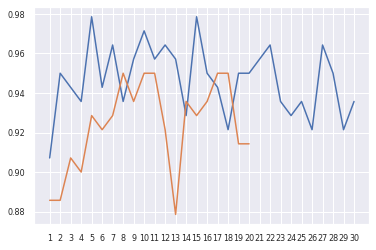

In [211]:
listaPCA = []
listaPCA2 = []

for i in tqdm(nKomp):
  pca = PCA(n_components=i)
  noviSet = pca.fit_transform(fullData.drop("target", axis=1))
  trainXS, testXS, trainY, testY = train_test_split(noviSet, oznake, test_size=0.25)
  clf = LogisticRegression().fit(trainXS, np.ravel(trainY))
  prediction = clf.predict(testXS)
  listaPCA.append(accuracy_score(testY, prediction))

for i in tqdm(nKomp2):
  pca = PCA(n_components=i)
  noviSet = pca.fit_transform(testData.drop("target", axis=1))
  trainXS, testXS, trainY, testY = train_test_split(noviSet, labels, test_size=0.25)
  clf = LogisticRegression().fit(trainXS, np.ravel(trainY))
  prediction = clf.predict(testXS)
  listaPCA2.append(accuracy_score(testY, prediction))

fpr, tpr, _ = roc_curve(testY2, prediction)
ROClist.append([fpr, tpr])
plt.plot(nKomp,listaPCA)
plt.plot(nKomp2,listaPCA2)
plt.xticks(nKomp)
plt.tick_params(labelsize=8);
accuAll.append(["Logistic regression", max(listaPCA)*100, max(listaPCA2)*100])

print("Najbolja točnost na test setu je {:.2f}% za n={:d} komponenti".format(max(listaPCA)*100, listaPCA.index(max(listaPCA))+1))
print("Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je {:.2f}% za n={:d} komponenti".format(max(listaPCA2)*100, listaPCA2.index(max(listaPCA2))+1))

SVM

100%|██████████| 20/20 [00:00<00:00, 41.18it/s]


Najbolja točnost na test setu je 98.57% za n=9 komponenti
Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je 97.86% za n=20 komponenti


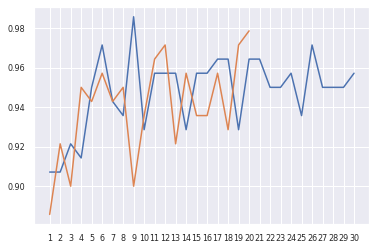

In [212]:
listaPCA = []
listaPCA2 = []

for i in tqdm(nKomp):
  pca = PCA(n_components=i)
  noviSet = pca.fit_transform(fullData.drop("target", axis=1))
  trainXS, testXS, trainY, testY = train_test_split(noviSet, oznake, test_size=0.25)
  clf = svm.SVC(kernel="linear").fit(trainXS, np.ravel(trainY))
  prediction = clf.predict(testXS)
  listaPCA.append(accuracy_score(testY, prediction))

for i in tqdm(nKomp2):
  pca = PCA(n_components=i)
  noviSet = pca.fit_transform(testData.drop("target", axis=1))
  trainXS, testXS, trainY, testY = train_test_split(noviSet, labels, test_size=0.25)
  clf = svm.SVC(kernel="linear").fit(trainXS, np.ravel(trainY))
  prediction = clf.predict(testXS)
  listaPCA2.append(accuracy_score(testY, prediction))

fpr, tpr, _ = roc_curve(testY2, prediction)
ROClist.append([fpr, tpr])
plt.plot(nKomp,listaPCA)
plt.plot(nKomp2,listaPCA2)
plt.xticks(nKomp)
plt.tick_params(labelsize=8);
accuAll.append(["SVM", max(listaPCA)*100, max(listaPCA2)*100])

print("Najbolja točnost na test setu je {:.2f}% za n={:d} komponenti".format(max(listaPCA)*100, listaPCA.index(max(listaPCA))+1))
print("Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je {:.2f}% za n={:d} komponenti".format(max(listaPCA2)*100, listaPCA2.index(max(listaPCA2))+1))

Random Forest

100%|██████████| 20/20 [00:05<00:00,  3.99it/s]


Najbolja točnost na test setu je 97.86% za n=15 komponenti
Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je 97.86% za n=12 komponenti


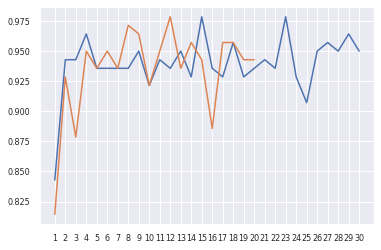

In [213]:
listaPCA = []
listaPCA2 = []

for i in tqdm(nKomp):
  pca = PCA(n_components=i)
  noviSet = pca.fit_transform(fullData.drop("target", axis=1))
  trainXS, testXS, trainY, testY = train_test_split(noviSet, oznake, test_size=0.25)
  clf = RandomForestClassifier().fit(trainXS, np.ravel(trainY))
  prediction = clf.predict(testXS)
  listaPCA.append(accuracy_score(testY, prediction))

for i in tqdm(nKomp2):
  pca = PCA(n_components=i)
  noviSet = pca.fit_transform(testData.drop("target", axis=1))
  trainXS, testXS, trainY, testY = train_test_split(noviSet, labels, test_size=0.25)
  clf = RandomForestClassifier().fit(trainXS, np.ravel(trainY))
  prediction = clf.predict(testXS)
  listaPCA2.append(accuracy_score(testY, prediction))

fpr, tpr, _ = roc_curve(testY2, prediction)
ROClist.append([fpr, tpr])
plt.plot(nKomp,listaPCA)
plt.plot(nKomp2,listaPCA2)
plt.xticks(nKomp)
plt.tick_params(labelsize=8);
accuAll.append(["Random Forest", max(listaPCA)*100, max(listaPCA2)*100])


print("Najbolja točnost na test setu je {:.2f}% za n={:d} komponenti".format(max(listaPCA)*100, listaPCA.index(max(listaPCA))+1))
print("Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je {:.2f}% za n={:d} komponenti".format(max(listaPCA2)*100, listaPCA2.index(max(listaPCA2))+1))

Naive Bayes

100%|██████████| 20/20 [00:00<00:00, 85.75it/s] 


Najbolja točnost na test setu je 92.86% za n=15 komponenti
Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je 97.14% za n=8 komponenti


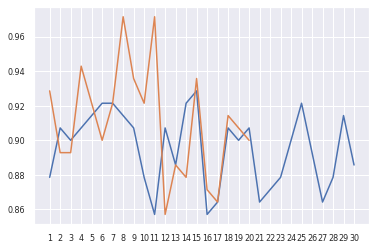

In [214]:
listaPCA = []
listaPCA2 = []

for i in tqdm(nKomp):
  pca = PCA(n_components=i)
  noviSet = pca.fit_transform(fullData.drop("target", axis=1))
  trainXS, testXS, trainY, testY = train_test_split(noviSet, oznake, test_size=0.25)
  clf = GaussianNB().fit(trainXS, np.ravel(trainY))
  prediction = clf.predict(testXS)
  listaPCA.append(accuracy_score(testY, prediction))

for i in tqdm(nKomp2):
  pca = PCA(n_components=i)
  noviSet = pca.fit_transform(testData.drop("target", axis=1))
  trainXS, testXS, trainY, testY = train_test_split(noviSet, labels, test_size=0.25)
  clf = GaussianNB().fit(trainXS, np.ravel(trainY))
  prediction = clf.predict(testXS)
  listaPCA2.append(accuracy_score(testY, prediction))

fpr, tpr, _ = roc_curve(testY2, prediction)
ROClist.append([fpr, tpr])
plt.plot(nKomp,listaPCA)
plt.plot(nKomp2,listaPCA2)
plt.xticks(nKomp)
plt.tick_params(labelsize=8);
accuAll.append(["Naive Bayes", max(listaPCA)*100, max(listaPCA2)*100])

print("Najbolja točnost na test setu je {:.2f}% za n={:d} komponenti".format(max(listaPCA)*100, listaPCA.index(max(listaPCA))+1))
print("Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je {:.2f}% za n={:d} komponenti".format(max(listaPCA2)*100, listaPCA2.index(max(listaPCA2))+1))

Decision Tree

100%|██████████| 20/20 [00:00<00:00, 73.92it/s]


Najbolja točnost na test setu je 94.29% za n=17 komponenti
Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je 92.86% za n=9 komponenti


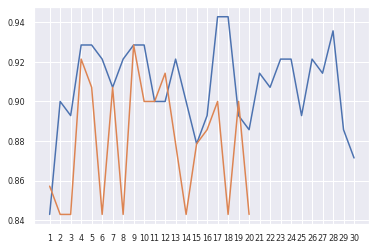

In [215]:
listaPCA = []
listaPCA2 = []

for i in tqdm(nKomp):
  pca = PCA(n_components=i)
  noviSet = pca.fit_transform(fullData.drop("target", axis=1))
  trainXS, testXS, trainY, testY = train_test_split(noviSet, oznake, test_size=0.25)
  clf = DecisionTreeClassifier().fit(trainXS, np.ravel(trainY))
  prediction = clf.predict(testXS)
  listaPCA.append(accuracy_score(testY, prediction))

for i in tqdm(nKomp2):
  pca = PCA(n_components=i)
  noviSet = pca.fit_transform(testData.drop("target", axis=1))
  trainXS, testXS, trainY, testY = train_test_split(noviSet, labels, test_size=0.25)
  clf = DecisionTreeClassifier().fit(trainXS, np.ravel(trainY))
  prediction = clf.predict(testXS)
  listaPCA2.append(accuracy_score(testY, prediction))

fpr, tpr, _ = roc_curve(testY2, prediction)
ROClist.append([fpr, tpr])
plt.plot(nKomp,listaPCA)
plt.plot(nKomp2,listaPCA2)
plt.xticks(nKomp)
plt.tick_params(labelsize=8);
accuAll.append(["Decision Tree", max(listaPCA)*100, max(listaPCA2)*100])


print("Najbolja točnost na test setu je {:.2f}% za n={:d} komponenti".format(max(listaPCA)*100, listaPCA.index(max(listaPCA))+1))
print("Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je {:.2f}% za n={:d} komponenti".format(max(listaPCA2)*100, listaPCA2.index(max(listaPCA2))+1))

kNN

100%|██████████| 20/20 [00:00<00:00, 59.59it/s]


Najbolja točnost na test setu je 97.86% za n=21 komponenti
Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je 95.71% za n=9 komponenti


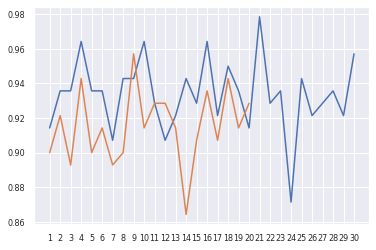

In [216]:
listaPCA = []
listaPCA2 = []

for i in tqdm(nKomp):
  pca = PCA(n_components=i)
  noviSet = pca.fit_transform(fullData.drop("target", axis=1))
  trainXS, testXS, trainY, testY = train_test_split(noviSet, oznake, test_size=0.25)
  clf = KNeighborsClassifier(n_neighbors=9).fit(trainXS, np.ravel(trainY))
  prediction = clf.predict(testXS)
  listaPCA.append(accuracy_score(testY, prediction))

for i in tqdm(nKomp2):
  pca = PCA(n_components=i)
  noviSet = pca.fit_transform(testData.drop("target", axis=1))
  trainXS, testXS, trainY, testY = train_test_split(noviSet, labels, test_size=0.25)
  clf = KNeighborsClassifier(n_neighbors=9).fit(trainXS, np.ravel(trainY))
  prediction = clf.predict(testXS)
  listaPCA2.append(accuracy_score(testY, prediction))

fpr, tpr, _ = roc_curve(testY2, prediction)
ROClist.append([fpr, tpr])
plt.plot(nKomp,listaPCA)
plt.plot(nKomp2,listaPCA2)
plt.xticks(nKomp)
plt.tick_params(labelsize=8);
accuAll.append(["kNN", max(listaPCA)*100, max(listaPCA2)*100])


print("Najbolja točnost na test setu je {:.2f}% za n={:d} komponenti".format(max(listaPCA)*100, listaPCA.index(max(listaPCA))+1))
print("Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je {:.2f}% za n={:d} komponenti".format(max(listaPCA2)*100, listaPCA2.index(max(listaPCA2))+1))

XGBoost

100%|██████████| 20/20 [00:01<00:00, 12.06it/s]


Najbolja točnost na test setu je 99.29% za n=17 komponenti
Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je 95.71% za n=11 komponenti


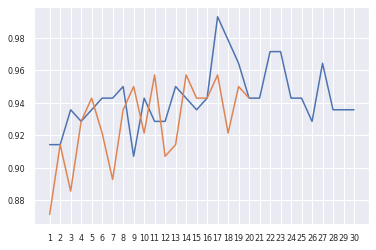

In [217]:
listaPCA = []
listaPCA2 = []

for i in tqdm(nKomp):
  pca = PCA(n_components=i)
  noviSet = pca.fit_transform(fullData.drop("target", axis=1))
  trainXS, testXS, trainY, testY = train_test_split(noviSet, oznake, test_size=0.25)
  clf = xgb.XGBClassifier().fit(trainXS, np.ravel(trainY))
  prediction = clf.predict(testXS)
  listaPCA.append(accuracy_score(testY, prediction))

for i in tqdm(nKomp2):
  pca = PCA(n_components=i)
  noviSet = pca.fit_transform(testData.drop("target", axis=1))
  trainXS, testXS, trainY, testY = train_test_split(noviSet, labels, test_size=0.25)
  clf = xgb.XGBClassifier().fit(trainXS, np.ravel(trainY))
  prediction = clf.predict(testXS)
  listaPCA2.append(accuracy_score(testY, prediction))

fpr, tpr, _ = roc_curve(testY2, prediction)
ROClist.append([fpr, tpr])
plt.plot(nKomp,listaPCA)
plt.plot(nKomp2,listaPCA2)
plt.xticks(nKomp)
plt.tick_params(labelsize=8);
accuAll.append(["XGBoost", max(listaPCA)*100, max(listaPCA2)*100])


print("Najbolja točnost na test setu je {:.2f}% za n={:d} komponenti".format(max(listaPCA)*100, listaPCA.index(max(listaPCA))+1))
print("Najbolja točnost na test setu iz skupa podataka s izbačenim koreliranim značajkama je {:.2f}% za n={:d} komponenti".format(max(listaPCA2)*100, listaPCA2.index(max(listaPCA2))+1))

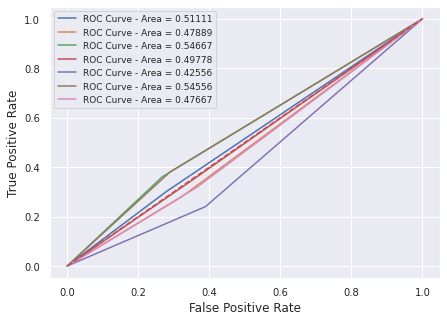

In [218]:
legend=[]
plt.figure(figsize=(7,5))
for i in ROClist:
  plt.plot(i[0], i[1])
  legend.append("ROC Curve - Area = {:.5f}".format(auc(i[0], i[1])))
plt.legend(legend, fontsize=9)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.tick_params(labelsize=10);

In [219]:
print("{:^20} {:^20} {:^20}".format("","osnovni skup(%)", "uređeni skup(%)"))
for i in accuAll:
      print("{:^20} {:^20.2f} {:^20.2f}".format(i[0], i[1], i[2]))

                       osnovni skup(%)      uređeni skup(%)   
Logistic regression         97.86                95.00        
        SVM                 98.57                97.86        
   Random Forest            97.86                97.86        
    Naive Bayes             92.86                97.14        
   Decision Tree            94.29                92.86        
        kNN                 97.86                95.71        
      XGBoost               99.29                95.71        


**Zaključak**

Uređivanjem značajki za većinu modela dobivaju se malo bolji rezultati. Korištenje kBest i PCA također poboljšava rezultate. U usporedbi svih modela, za oba skupa podataka, najbolje rezultate je dao model XGBoost. 